# NYC Crash Analysis - Mark Tanios

### 1. Add the imports

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

### Set the option to show full columns and read the parquet output of the code

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)
df = pd.read_parquet('../data/output/nyc_crashes_ready_for_analysis.parquet')

## I wanted to answer 3 questions:
### 1. What is the montly trend of crashes over months?
### 2. Are the crashes related to holidays?
### 3. What time of day do most crashes occur?


### Here are the answers:

### 1. What is the montly trend of crashes over months?

month
2025-01    6434
2025-02    5961
2025-03    5383
Freq: M, dtype: int64


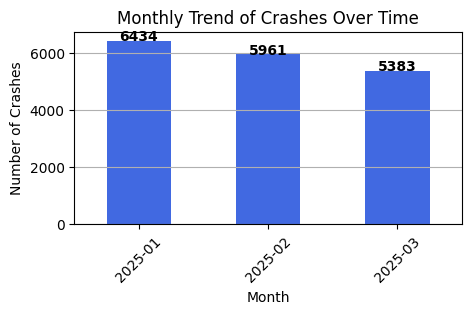

In [13]:
# ensure 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# extract Year-Month format (YYYY-MM)
df["month"] = df["date"].dt.to_period("M")

# Group by month and count crashes
crash_trend_monthly = df.groupby("month").size()

# Plot the monthly trend as a bar chart
plt.figure(figsize=(5, 2.5))
    
crash_trend_monthly.plot(kind="bar", color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.title("Monthly Trend of Crashes Over Time")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

### 2. Are the crashes related to holidays?

In [4]:
df["is_holiday"] = df["is_holiday"].astype(bool)

# Count crashes on holidays and non-holidays
crash_counts = df["is_holiday"].value_counts(normalize=True) * 100  # Get percentage

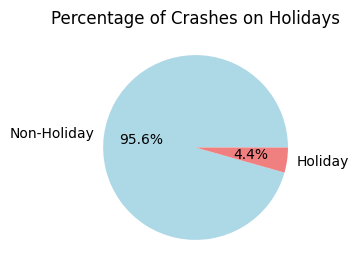

In [5]:
# Plot Pie Chart
plt.figure(figsize=(3, 3))
plt.pie(crash_counts, labels=["Non-Holiday", "Holiday"], autopct="%.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Percentage of Crashes on Holidays")
plt.show()

### It seems that the answer is yes, most crashes happen on Non-Holiday days.

### 3. What time of day do most crashes occur?

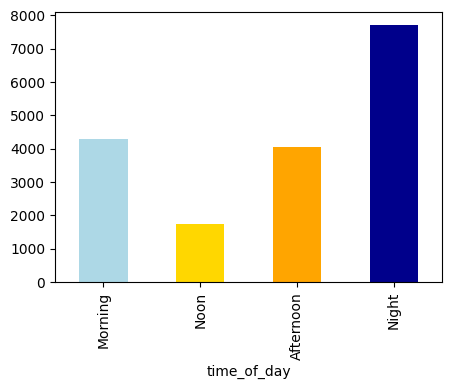

In [26]:
def categorize_time(hour):
    if 5 <= hour < 11:
        return "Morning"
    elif 11 <= hour < 13:
        return "Noon"
    elif 13 <= hour < 17:
        return "Afternoon"
    else:
        return "Night"

# convert crash_time to hour
df["crash_hour"] = pd.to_datetime(df["crash_time"], format="%H:%M", errors="coerce").dt.hour

# apply categorization
df["time_of_day"] = df["crash_hour"].apply(categorize_time)

# count occurrences per category
crash_by_time_of_day = df["time_of_day"].value_counts()

# plot as a bar chart
plt.figure(figsize=(5, 3.5))
ax = crash_by_time_of_day.reindex(["Morning", "Noon", "Afternoon", "Night"]).plot(kind="bar", color=["lightblue", "gold", "orange", "darkblue"])

### It seems that most of the accidents happen at night